## Нелинейная регрессия
Необходимо реализовать нейросетевую аппроксимацию для каждой из двух следущих функций, заданных на отрезке:  
1) $f_1(x) = \sin(x + x^2), x\in[0, 5]$
2) $f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$


# Первая функция

$f_1(x) = \sin(x + x^2), x\in[0, 5]$

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

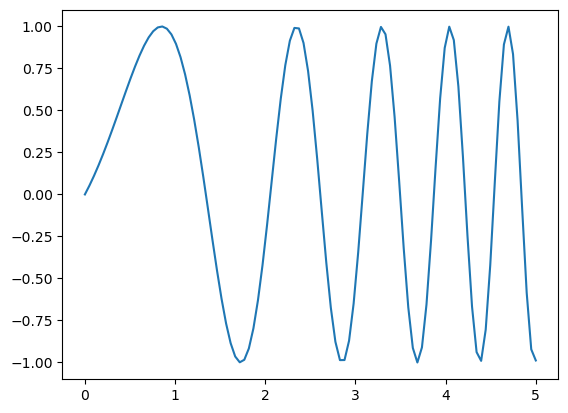

In [2]:
def f1(x):
    return np.sin(x + x**2)

xx = np.linspace(0, 5, 100, dtype=np.float32)
yy = f1(xx)
plt.plot(xx, yy)

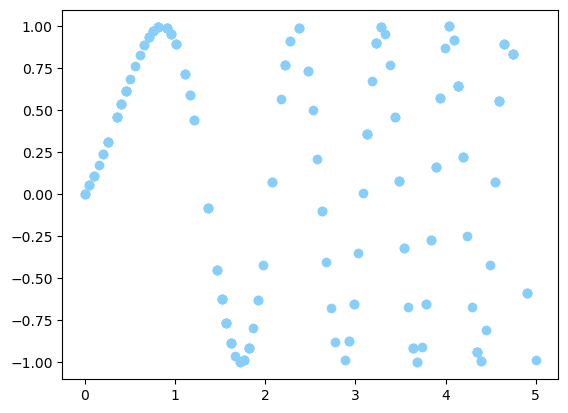

In [3]:
np.random.seed(5)
x1 = np.sort(np.random.choice(xx, 200))
x1 = x1.reshape(len(x1), 1)
y1 = f1(x1)
plt.plot(x1, y1, 'o', color = 'lightskyblue')

In [4]:
input_size = 1
hidden_size_1 = 50
hidden_size_2 = 50
hidden_size_3 = 50
output_size = 1
num_epochs = 200000
learning_rate = 0.01

model = nn.Sequential(nn.Linear(input_size, hidden_size_1), 
                      nn.ReLU(), 
                      nn.Linear(hidden_size_1, hidden_size_2), 
                      nn.ReLU(),
                      nn.Linear(hidden_size_2, hidden_size_3), 
                      nn.ReLU(), 
                      nn.Linear(hidden_size_3, output_size))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch [50000/200000], Loss: 0.1300
Epoch [100000/200000], Loss: 0.0084
Epoch [150000/200000], Loss: 0.0037
Epoch [200000/200000], Loss: 0.0024


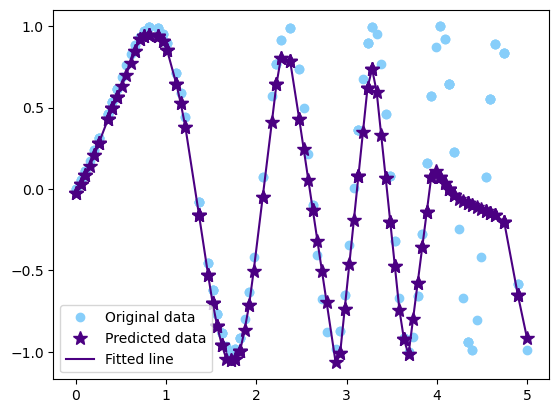

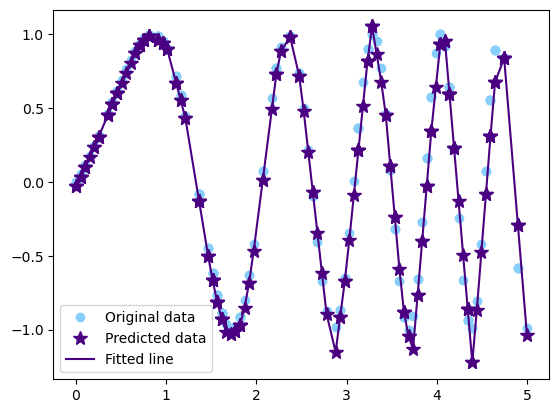

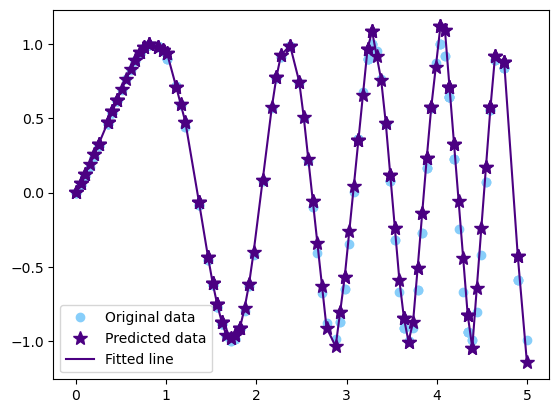

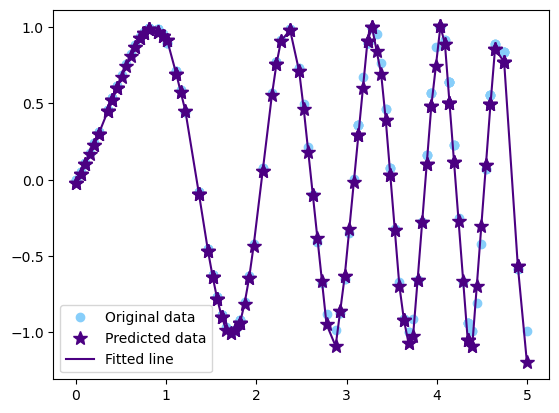

In [5]:
inputs = torch.from_numpy(x1)
targets = torch.from_numpy(y1)

for epoch in range(num_epochs):

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        plt.figure()
        plt.plot(inputs.numpy(), targets.numpy(), 'o', color = 'lightskyblue', label='Original data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), '*', markersize=10, color = 'indigo', label = 'Predicted data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), color = 'indigo', label='Fitted line')
        plt.legend()

# Вторая функция

$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

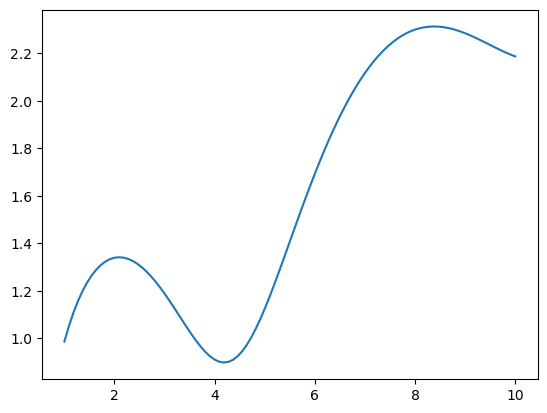

In [17]:
def f2(x):
    return np.log(x + 2 * np.sin(x))

xx = np.linspace(1,10,100, dtype=np.float32)
yy = f2(xx)
plt.plot(xx, yy )

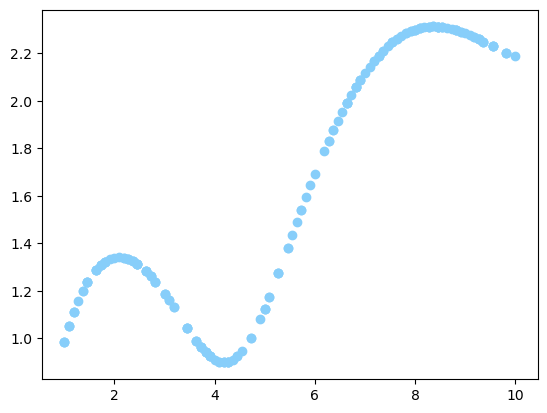

In [18]:
np.random.seed(5)
x1 = np.sort(np.random.choice(xx, 200))
x1 = x1.reshape(len(x1), 1)
y1 = f2(x1)
plt.plot(x1, y1, 'o', color = 'lightskyblue')

In [19]:
input_size = 1
hidden_size_1 = 100
hidden_size_2 = 100
hidden_size_3 = 100
output_size = 1
num_epochs = 30000
learning_rate = 0.01

model = nn.Sequential(nn.Linear(input_size, hidden_size_1), 
                      nn.ReLU(), 
                      nn.Linear(hidden_size_1, hidden_size_2), 
                      nn.ReLU(),
                      nn.Linear(hidden_size_2, hidden_size_3), 
                      nn.ReLU(), 
                      nn.Linear(hidden_size_3, output_size))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch [5000/30000], Loss: 0.0119
Epoch [10000/30000], Loss: 0.0013
Epoch [15000/30000], Loss: 0.0006
Epoch [20000/30000], Loss: 0.0003
Epoch [25000/30000], Loss: 0.0000
Epoch [30000/30000], Loss: 0.0000


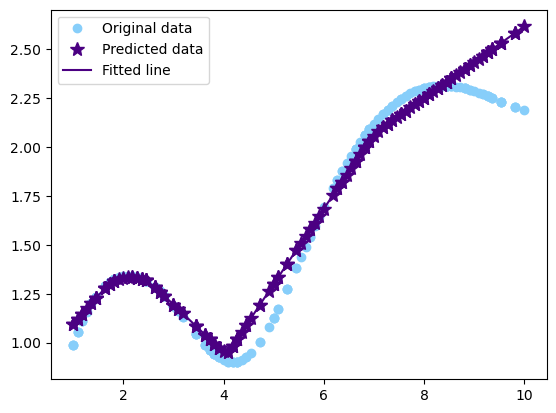

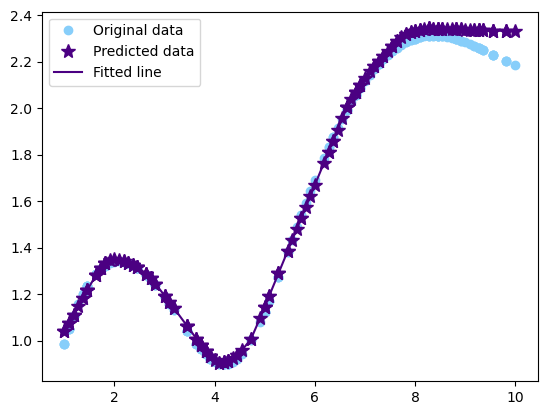

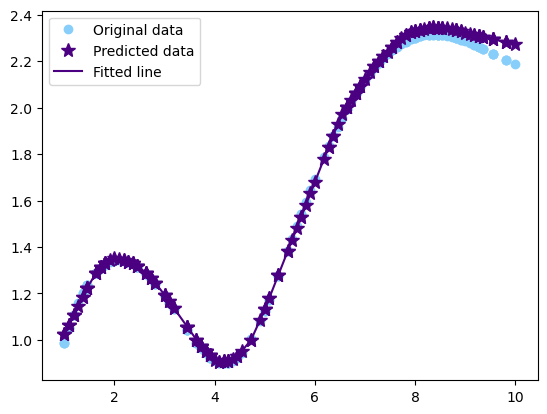

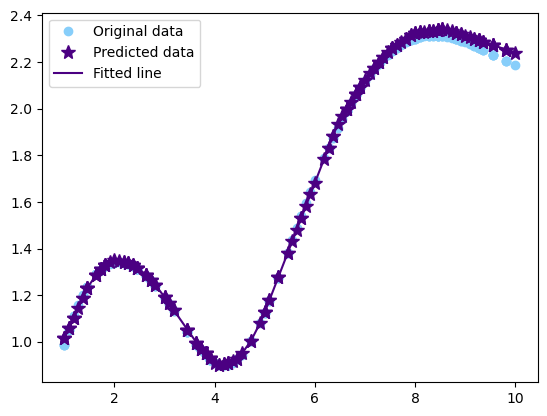

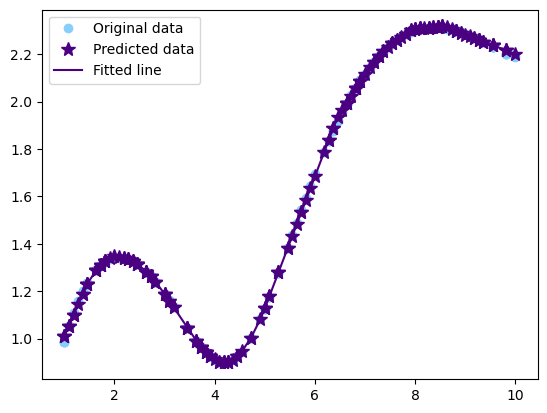

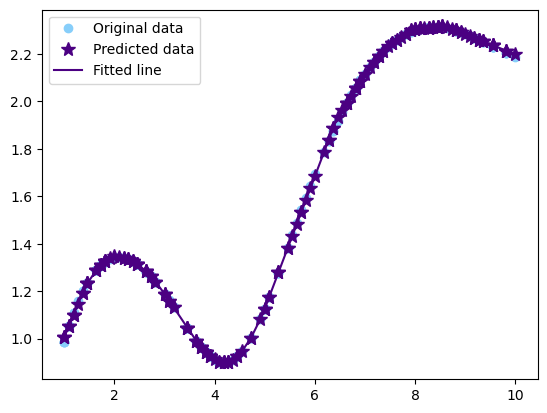

In [20]:
inputs = torch.from_numpy(x1)
targets = torch.from_numpy(y1)

for epoch in range(num_epochs):

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        plt.figure()
        plt.plot(inputs.numpy(), targets.numpy(), 'o', color = 'lightskyblue', label='Original data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), '*', markersize=10, color = 'indigo', label = 'Predicted data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), color = 'indigo', label='Fitted line')
        plt.legend()